# DASC 41103 - Project 3

## Import dependencies

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Subset, Dataset

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pathlib
import os
from PIL import Image

## Import data

In [2]:
# Set path to data
logo_path = pathlib.Path('/Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data')

# Read in a list of individual file paths
file_list = sorted([str(path) for path in logo_path.glob('*.png')])

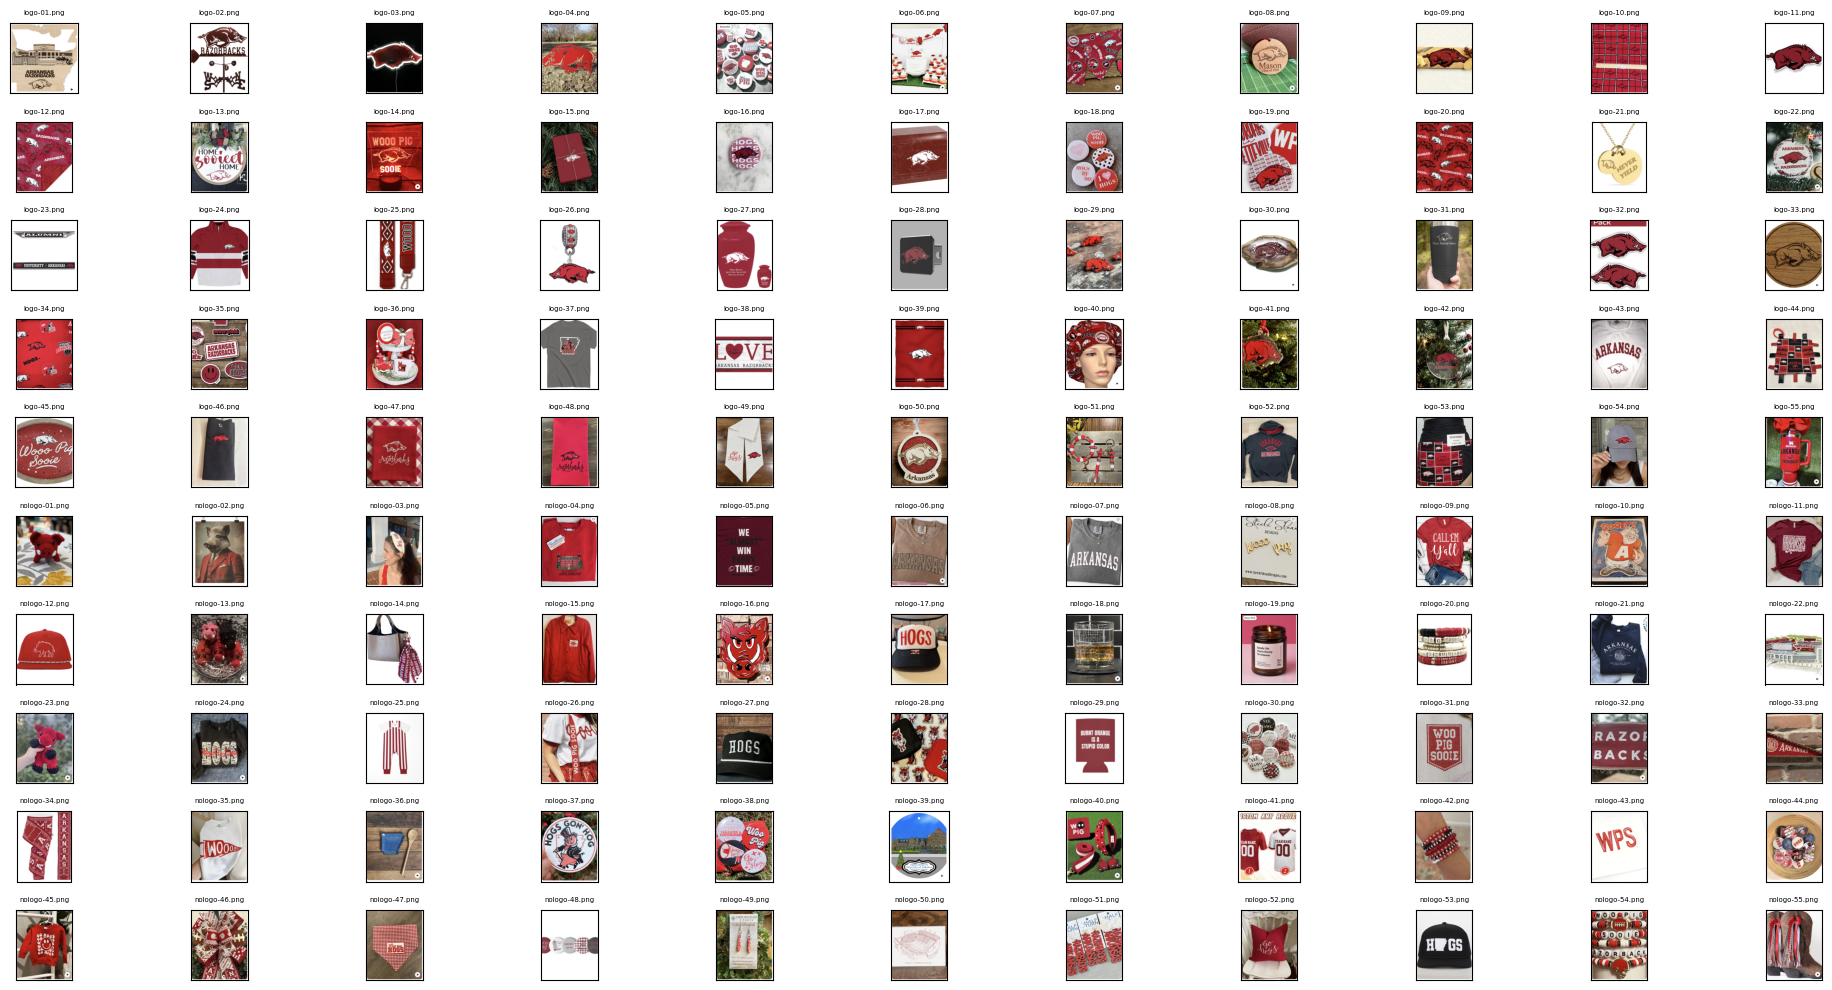

In [3]:
# View image dataset
fig = plt.figure(figsize=(20, 10))

for i, file in enumerate(file_list):
    img = Image.open(file)

    ax = fig.add_subplot(10, 11, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=5)
    
plt.tight_layout()
plt.show()

In [ ]:
# The images have variable sizes; we need to determine the smallest image dimensions
min_x = 10000
min_y = 10000
min_z = 4

for i, file in enumerate(file_list):
    img = Image.open(file)

    if np.array(img).shape[0] < min_x : min_x = np.array(img).shape[0]
    if np.array(img).shape[1] < min_y : min_y = np.array(img).shape[1]
    if np.array(img).shape[2] < min_z : min_z = np.array(img).shape[2]

print(f"Minimum image dimensions: ({min_x}, {min_y}, {min_z})")

RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
RGBA
Minimum image dimensions: (708, 648, 4)


In [5]:
# Set labels (nologo = 0 class)
labels = [0 if 'no' in os.path.basename(file) else 1
          for file in file_list]

In [6]:
class Joint_UDF_Dataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    # returns the corresponding sample to the given index
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [7]:
# Construct UDF dataset
joint_UDF_dataset = Joint_UDF_Dataset(file_list, labels)

for item in joint_UDF_dataset:
    print(' x: ', item[0], ' y: ', item[1])

 x:  /Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-01.png  y:  1
 x:  /Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-02.png  y:  1
 x:  /Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-03.png  y:  1
 x:  /Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-04.png  y:  1
 x:  /Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-05.png  y:  1
 x:  /Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-06.png  y:  1
 x:  /Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-07.png  y:  1
 x:  /Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj3/data/logo-08.png  y:  1
 x:  /Users/ruthwalters/Library/CloudStorage/Dro

## Prepare data

### Resize images

In [9]:
# Set minimum image dimensions: (708, 648, 4)
img_height, img_width = 708, 648

# Transform images to uniform size
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)

data = ImageDataset(file_list, labels, transform)

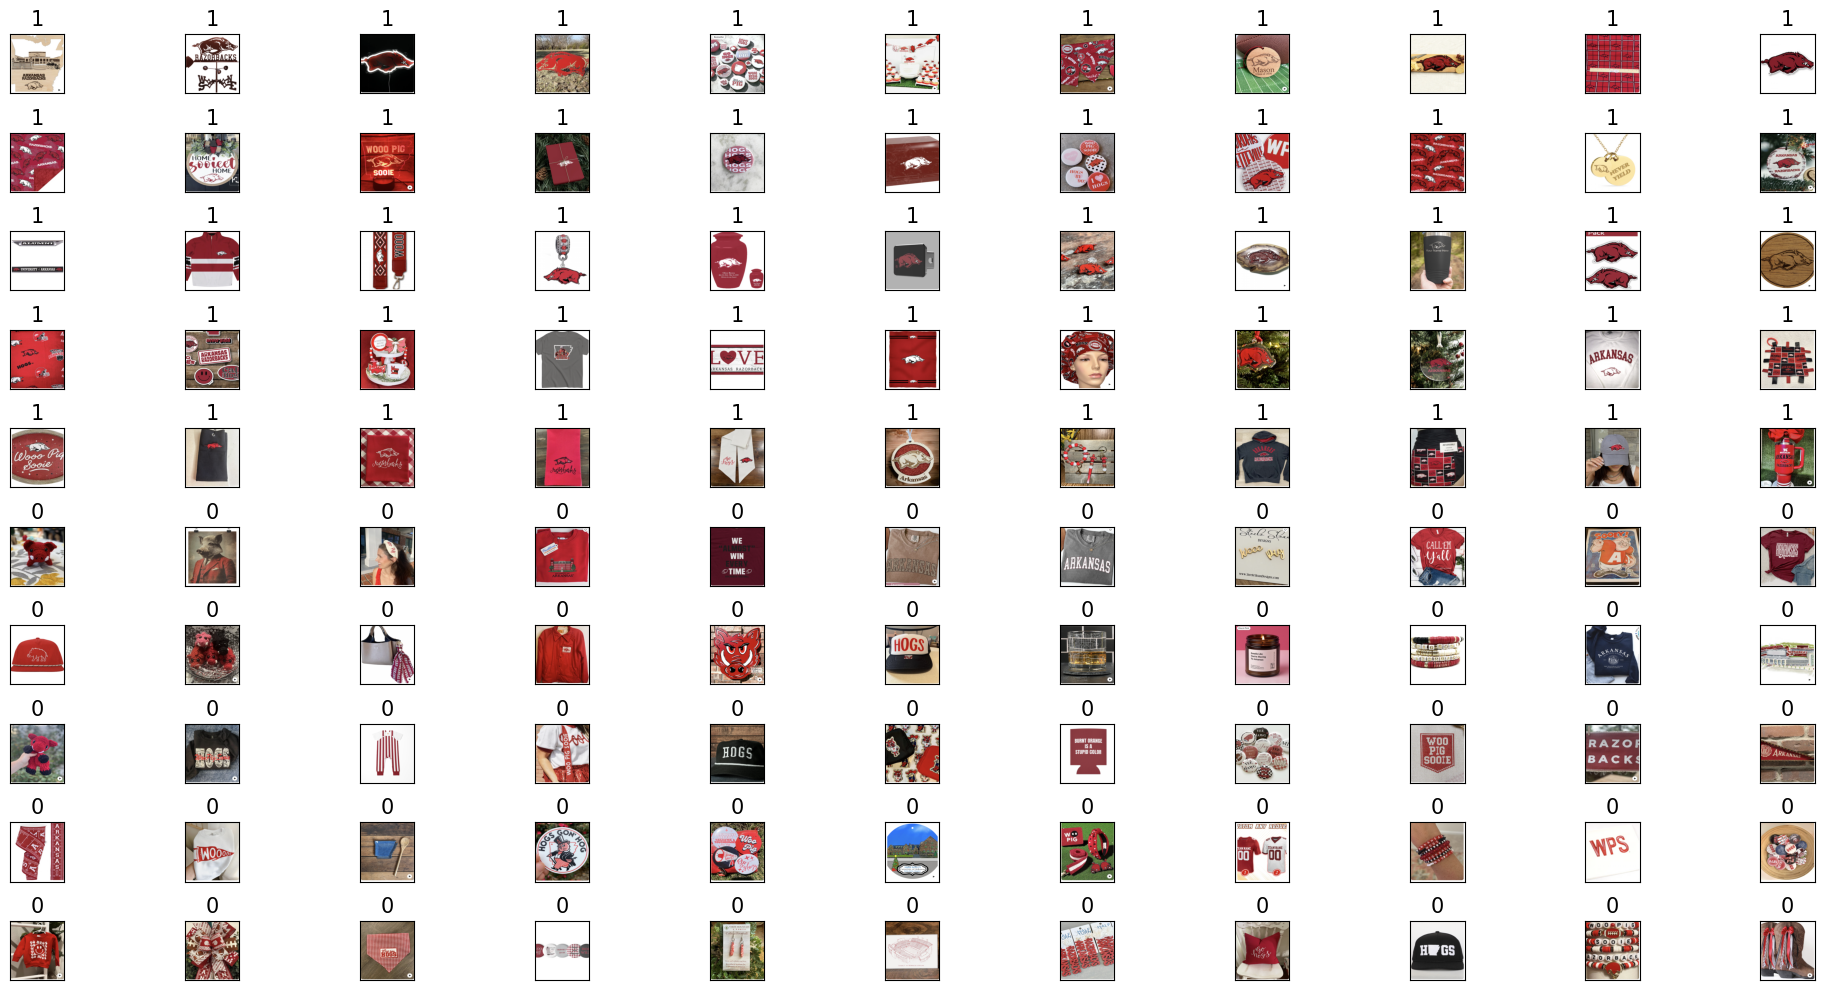

In [10]:
fig = plt.figure(figsize=(20,10))
for i, example in enumerate(data):
    ax = fig.add_subplot(10, 11, i+1)
    ax.set_xticks([]); ax.set_yticks([])

    # adding to fix warning that some values were outside [0,1] with range [0.000551827..1.0000002]
    # Clamp the tensor values to the range [0, 1] before displaying
    img_display = torch.clamp(example[0], 0, 1)

    # back to original book code
    ax.imshow(img_display.numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()

### Split data into training, testing, and validation sets

In [40]:
# Set seed
torch.manual_seed(41103)

# Define split sizes; 22/110 -> 20% of the dataset
valid_size = 22                 
dataset_size = len(data)

indices = torch.randperm(dataset_size)

test_size = dataset_size // 5
valid_size = dataset_size // 5

test_idx = indices[:test_size]
valid_idx = indices[test_size:test_size+valid_size]
train_idx = indices[test_size+valid_size:]

train_transform = transforms.Compose([
    #transforms.RandomCrop((454, 454)),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

eval_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

dataset = ImageDataset(file_list, labels, transform=train_transform)

train_dataset = Subset(dataset, train_idx)
valid_dataset = Subset(ImageDataset(file_list, labels, transform=eval_transform), valid_idx)
test_dataset  = Subset(ImageDataset(file_list, labels, transform=eval_transform), test_idx)

train_dl = DataLoader(train_dataset, batch_size=8, shuffle=True)
valid_dl = DataLoader(valid_dataset, batch_size=8, shuffle=False)
test_dl  = DataLoader(test_dataset,  batch_size=8, shuffle=False)

## Model construction

In [41]:
# define sequential neural network model
model = nn.Sequential()

model.add_module('conv1', nn.Conv2d(in_channels=4, out_channels=32, kernel_size=5, padding=2))
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))

model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))

model.add_module('flatten', nn.Flatten())

# 64 * 32 * 32 = 65536
model.add_module('fc1', nn.Linear(64 * 32 * 32, 1024))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(p=0.5))
model.add_module('fc2', nn.Linear(1024, 2))

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [43]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [44]:
# takes the architecture we previously established and stores it in a model, pulls in 
#  training and test data, and loads any other meaningful parameters

def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    
    # for each epoch: 
    for epoch in range(num_epochs):
        
        # put the model in training mode
        model.train()
        
        # for each batch:
        for x_batch, y_batch in train_dl:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            
            # forward pass
            pred = model(x_batch)

            # calculate loss
            loss = loss_fn(pred, y_batch)

            # back propagation
            loss.backward()

            # update weights
            optimizer.step()

            # reset the gradients to zero (allows us to run the gradient again)
            optimizer.zero_grad()

            # store outputs (loss, accuracy) of this batch
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().cpu()

        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)

        # put the model in evaluation mode
        model.eval()
        with torch.no_grad():
            # for every validation set- calculate evaluation metrics
            for x_batch, y_batch in valid_dl:
                x_batch = x_batch.to(device)
                y_batch = y_batch.to(device)
                pred = model(x_batch)
                
                # calculate and store loss
                loss = loss_fn(pred, y_batch)
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
                
                # calculate and store accuracy
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum().cpu()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

        # update user on model progress; allows user to monitor overfitting 
        #  (i.e training vs validation accuracy)
        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    
    # return model and evaluation metrics
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

In [45]:
torch.manual_seed(41103)

num_epochs = 20

hist = train(model, num_epochs, train_dl, valid_dl)

Epoch 1 accuracy: 0.4091 val_accuracy: 0.3182
Epoch 2 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 3 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 4 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 5 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 6 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 7 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 8 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 9 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 10 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 11 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 12 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 13 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 14 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 15 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 16 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 17 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 18 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 19 accuracy: 0.5303 val_accuracy: 0.3182
Epoch 20 accuracy: 0.5303 val_accuracy: 0.3182


In [46]:
print(model)


Sequential(
  (conv1): Conv2d(4, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=65536, out_features=1024, bias=True)
  (relu3): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1024, out_features=2, bias=True)
)


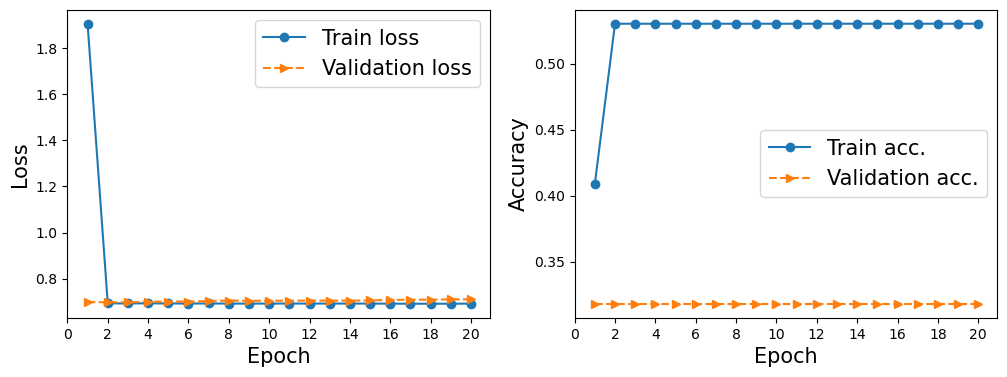

In [47]:
x_arr = np.arange(len(hist[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '-->', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_xticks(np.arange(0,21,2))
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '-->', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_xticks(np.arange(0,21,2))
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/14_13.png')
plt.show()

In [48]:
# if you're using gpu, synchronize with cpu
if device.type == 'cuda':
    torch.cuda.synchronize()
model_cpu = model.cpu()

def evaluate(model, test_dl):
    model.eval()
    model = model.to(device)
    correct = 0
    total = 0

    with torch.no_grad():
        for x_batch, y_batch in test_dl:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            pred = model(x_batch)
            predicted_labels = torch.argmax(pred, dim=1)

            correct += (predicted_labels == y_batch).sum().item()
            total += y_batch.size(0)

    accuracy = correct / total
    print(f"Test accuracy: {accuracy * 100:.2f}%")
    return accuracy


# Run evaluation
evaluate(model, test_dl)

Test accuracy: 59.09%


0.5909090909090909

RuntimeError: Given groups=1, weight of size [32, 4, 5, 5], expected input[1, 1, 128, 128] to have 4 channels, but got 1 channels instead

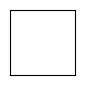

In [49]:
# visually examine model preformance; may allow us to identify common misclassifications
fig = plt.figure(figsize=(12, 12))
for i in range(144):
    ax = fig.add_subplot(12, 12, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = test_dataset[i][0][0, :, :]
    pred = model(img.unsqueeze(0).unsqueeze(1)) # alternatively: mnist_test_dataset.data[i].float()
    y_pred = torch.argmax(pred)
    ax.imshow(img, cmap='gray_r')
    ax.text(0.85, 0.15, y_pred.item(),
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)

plt.show()